<a href="https://colab.research.google.com/github/estherapaza/Project/blob/main/E_Activity_2_Images_APAZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.8 MB/s eta 0:00:00


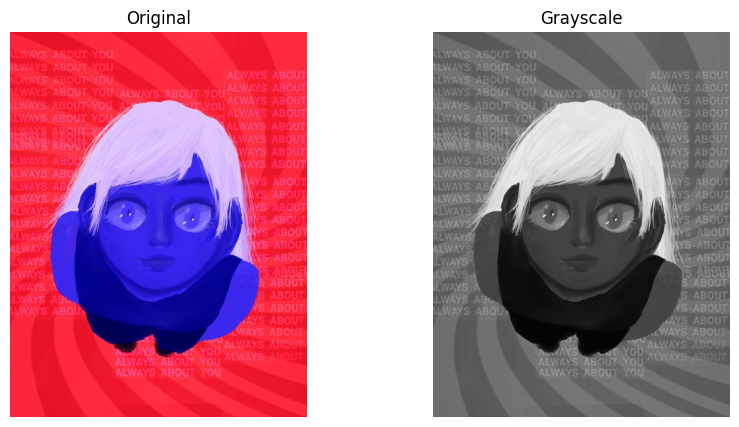

In [1]:
%pip install cython scipy matplotlib opencv-python pillow

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Cargar imagen y convertir a escala de grises
image = Image.open('/content/blueeyes.jpg')
gray_image = image.convert("L")

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale")
plt.axis("off")
plt.show()

# Convertir imagen a array de NumPy
image_array = np.array(gray_image, dtype=np.uint8)

In [3]:
def apply_gaussian_filter(image_list, width, height):
    kernel = [[1, 2, 1],
              [2, 4, 2],
              [1, 2, 1]]
    kernel_sum = 16

    filtered_image = [[0] * width for _ in range(height)]

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            sum_pixels = 0
            for ky in range(-1, 2):
                for kx in range(-1, 2):
                    sum_pixels += image_list[y + ky][x + kx] * kernel[ky + 1][kx + 1]
            filtered_image[y][x] = min(255, max(0, sum_pixels // kernel_sum))
    return filtered_image

def sobel_filter_python(image):
    height, width = image.shape
    Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
    gradient_magnitude = np.zeros((height, width))
    for i in range(1, height-1):
        for j in range(1, width-1):
            gx = sum(image[i+k-1, j+l-1] * Gx[k][l] for k in range(3) for l in range(3))
            gy = sum(image[i+k-1, j+l-1] * Gy[k][l] for k in range(3) for l in range(3))
            gradient_magnitude[i, j] = (gx**2 + gy**2) ** 0.5
    return gradient_magnitude.astype(np.uint8)

def median_filter_python(input_image):
    h = len(input_image)
    w = len(input_image[0])
    output = [[0]*w for _ in range(h)]
    def get_pixel(i, j):
        if i < 0: i = 0
        if i >= h: i = h - 1
        if j < 0: j = 0
        if j >= w: j = w - 1
        return input_image[i][j]
    for y in range(h):
        for x in range(w):
            window = [get_pixel(y+dy, x+dx) for dy in [-1, 0, 1] for dx in [-1, 0, 1]]
            window.sort()
            output[y][x] = window[4]
    return output


      Filtro  Tiempo (s)
0  Gaussiano    1.095580
1      Sobel   23.845521
2    Mediana    1.262828


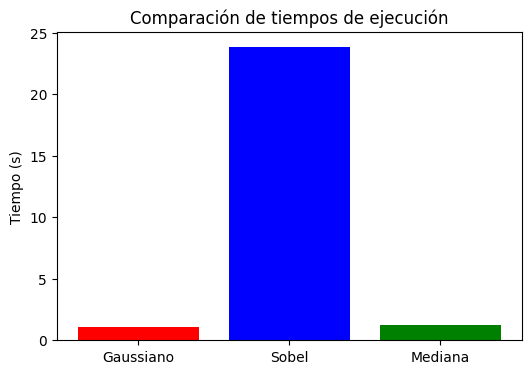

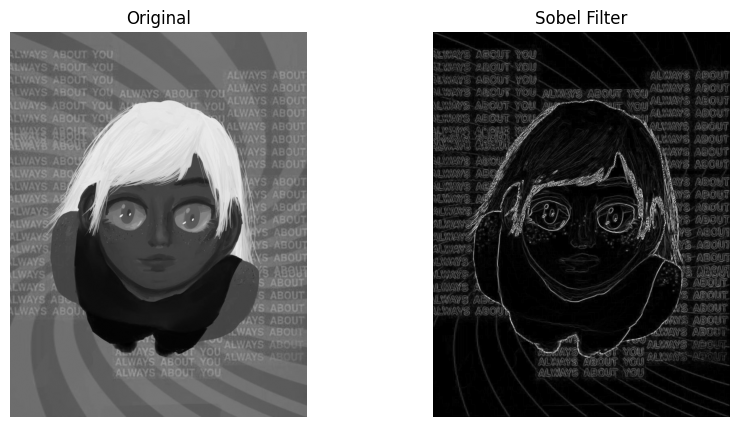

In [4]:
start_time = time.time()
filtered_python = apply_gaussian_filter(image_array.tolist(), image_array.shape[1], image_array.shape[0])
time_python = time.time() - start_time

start_time = time.time()
edge_python = sobel_filter_python(image_array)
time_sobel_python = time.time() - start_time

start_time = time.time()
median_python = median_filter_python(image_array.tolist())
time_median_python = time.time() - start_time

df = pd.DataFrame({
    "Filtro": ["Gaussiano", "Sobel", "Mediana"],
    "Tiempo (s)": [time_python, time_sobel_python, time_median_python]
})
print(df)

plt.figure(figsize=(6,4))
plt.bar(df["Filtro"], df["Tiempo (s)"], color=["red", "blue", "green"])
plt.ylabel("Tiempo (s)")
plt.title("Comparación de tiempos de ejecución")
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edge_python, cmap='gray')
plt.title("Sobel Filter")
plt.axis("off")

plt.show()
